In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
mnist =tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()


11501568/11490434 [==============================] - 3s 0us/step


In [22]:
x_test.shape

(10000, 28, 28)

In [4]:
#normalize the data...helps to scale up the pixel intensity in 0 & 1...helps to speed up the training

x_train = x_train/ 255
x_test = x_test/ 255

In [6]:
model =  keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #INPUT
    keras.layers.Dense(128, activation='relu'), #
    keras.layers.Dense(10, activation='softmax') #OUPUT LAYER
    
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=['accuracy'])


In [9]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6783 - accuracy: 0.8268 - val_loss: 0.3684 - val_accuracy: 0.8991
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3457 - accuracy: 0.9035 - val_loss: 0.3002 - val_accuracy: 0.9171
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2972 - accuracy: 0.9166 - val_loss: 0.2697 - val_accuracy: 0.9243
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2664 - accuracy: 0.9251 - val_loss: 0.2477 - val_accuracy: 0.9315
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2429 - accuracy: 0.9319 - val_loss: 0.2300 - val_accuracy: 0.9336
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2239 - accuracy: 0.9372 - val_loss: 0.2114 - val_accuracy: 0.9393
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2080 - accuracy: 0.9413 - val_loss: 0.2000 - val_accuracy:

In [10]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.8f" %test_loss)
print("Acc=%.8f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1673 - accuracy: 0.9518
Loss=0.16726673
Acc=0.95179999


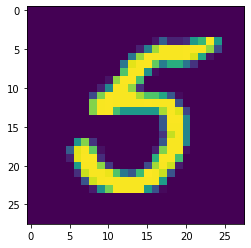

In [11]:
n= random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

value is = 5


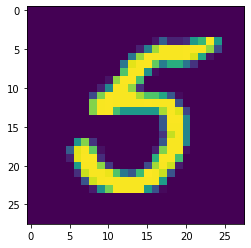

In [12]:
predicted_value=model.predict(x_test)
print("value is = %d" %np.argmax(predicted_value[n]) )
plt.imshow(x_test[n])
plt.show()

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

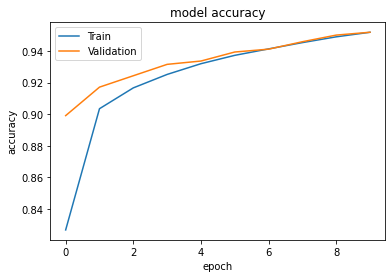

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

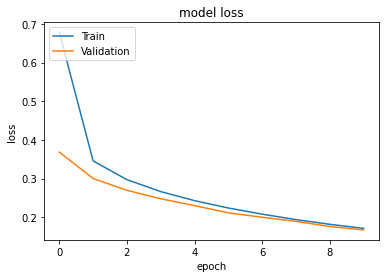

In [15]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
